# 1.このSprintについて

Sprintの目的
- スクラッチを通して線形回帰を理解する
- オブジェクト指向を意識した実装に慣れる
- 数式をコードに落とし込めるようにする

どのように学ぶか
- スクラッチで線形回帰を実装した後、学習と検証を行なっていきます。

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# 【問題1】仮定関数
以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。

$$
h_\theta(x) =  \theta_0 x_0 + \theta_1 x_1 + ... + \theta_j x_j + ... +\theta_n x_n.   (x_0 = 1)\\
$$

$x$ : 特徴量ベクトル


$\theta$ : パラメータベクトル


$n$ : 特徴量の数


$x_j$ : j番目の特徴量


$\theta_j$ : j番目のパラメータ（重み）


特徴量の数$n$は任意の値に対応できる実装にしてください。


なお、ベクトル形式で表すと以下のようになります。

$$
h_\theta(x) = \theta^T \cdot x.
$$
雛形


クラスの外から呼び出すことがないメソッドのため、Pythonの慣例としてアンダースコアを先頭にひとつつけています。

# 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。

$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]
$$

$\alpha$ : 学習率


$i$ : サンプルのインデックス


$j$ : 特徴量のインデックス

移動先の地点 = 今いる地点 - α ×今いる地点の勾配

:= 代入演算子

# 【問題3】推定
推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。


仮定関数 $h_\theta(x)$ の出力が推定結果です。

# 【問題4】平均二乗誤差
線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。


平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。


平均二乗誤差は以下の数式で表されます。

$$
L(\theta)=  \frac{1 }{ m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$

$m$ : 入力されるデータの数


$h_\theta()$ : 仮定関数


$x^{(i)}$ : i番目のサンプルの特徴量ベクトル


$y^{(i)}$ : i番目のサンプルの正解値


なお、最急降下法のための目的関数（損失関数）としては、これを2で割ったものを使用します。（問題5, 9）

In [2]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    return np.mean((y_pred - y)**2)

# 【問題5】目的関数
以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。


目的関数（損失関数） $J(\theta)$ は次の式です。
$$
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$


$m$ : 入力されるデータの数


$h_\theta()$ : 仮定関数


$x^{(i)}$ : i番目のサンプルの特徴量ベクトル


$y^{(i)}$ : i番目のサンプルの正解値

In [3]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """
    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        # バイアスの有無
        if not self.no_bias:
            X = np.insert(X, 0, 1, axis=1)
            if X_val is not None:
                X_val = np.insert(X_val, 0, 1, axis=1)
                
        # 係数の初期値を標準正規分布に従った乱数で生成
        self.coef_ = np.random.normal(loc=0, # 平均
                                      scale=1, # 標準偏差
                                      size=X.shape[1]).reshape(-1, 1)
        
        # イテレーション数回行う処理
        for i in range(self.iter):
            # 係数の更新
            self.coef_ = self._gradient_descent(X, y)
            # 目的関数
            self.loss[i] = MSE(self._linear_hypothesis(X), y) / 2         
            if X_val is not None:
                self.val_loss[i] = MSE(self._linear_hypothesis(X_val), y_val) / 2
            #verboseをTrueにした際は学習過程を出力    
            if self.verbose:
                print(f'train_loss：{self.loss[i]}')
                if X_val is not None:
                    print(f'val_loss：{self.val_loss[i]}')
            
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        return X @ self.coef_
    
    def _gradient_descent(self, X, y):
        """
        最急降下法により学習させる
        """
        self.coef_ = self.coef_ - (self.lr / X.shape[0]) * X.T @ (self._linear_hypothesis(X) - y) 
        
        return self.coef_

    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        if not self.no_bias:
            X = np.insert(X, 0, 1, axis=1)
        return self._linear_hypothesis(X).ravel()

# 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [4]:
# データの読み込み
train = pd.read_csv('../kaggledata/train.csv')
X = train[['GrLivArea', 'YearBuilt']].values
y = train[['SalePrice']].values

# 分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 標準化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### ・スクラッチによる推定

In [5]:
# 学習
slr = ScratchLinearRegression(1000, 0.01, no_bias=False, verbose=False)
slr.fit(X_train_std, y_train, X_test_std, y_test)

# 推定
slr_pred = slr.predict(X_test_std)

### ・SGDRegressorによる推定

In [6]:
from sklearn.linear_model import SGDRegressor

# 学習
sgdr = SGDRegressor(random_state=0)
sgdr.fit(X_train_std, y_train)

# 推定
sgdr_pred = sgdr.predict(X_test_std)

### ・比較

In [7]:
print(f'Scratch_predict：{slr_pred[:8].astype(int)}')
print(f'sklearn_predict：{sgdr_pred[:8].astype(int)}')

Scratch_predict：[264115 155082 127485 236339 138409  67991 212568 130905]
sklearn_predict：[263565 154984 127646 236171 138739  68051 212869 130902]


In [8]:
# RMSE
MSE(slr_pred, sgdr_pred)**.5

334.14441385991347

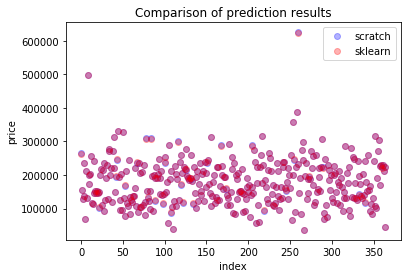

In [9]:
plt.title('Comparison of prediction results')
plt.xlabel('index')
plt.ylabel('price')
plt.plot(slr_pred, linestyle='None', marker='o', alpha=0.3, color='b', label='scratch')
plt.plot(sgdr_pred, linestyle='None', marker='o', alpha=0.3, color='r', label='sklearn')
plt.legend();

>ほぼ同じ予測ができている。

# 【問題7】学習曲線のプロット
学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。


線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

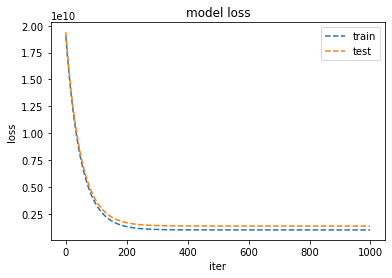

In [10]:
plt.title('model loss')
plt.xlabel('iter')
plt.ylabel('loss')
plt.plot(slr.loss, label=('train'), linestyle='--')
plt.plot(slr.val_loss, label=('test'), linestyle='--')
plt.legend();

# 【問題8】（アドバンス課題）バイアス項の除去
バイアス項 $\theta_0$ を抜くと学習がどう変化するか検証してください。また、線形回帰モデルにおけるバイアス項の役割の考察・調査を行ってください。

In [11]:
# 学習
slr_nobias = ScratchLinearRegression(1000, 0.01, no_bias=True, verbose=False)
slr_nobias.fit(X_train_std, y_train, X_test_std, y_test)

# 推定
slr_pred_nobias = slr_nobias.predict(X_test_std)

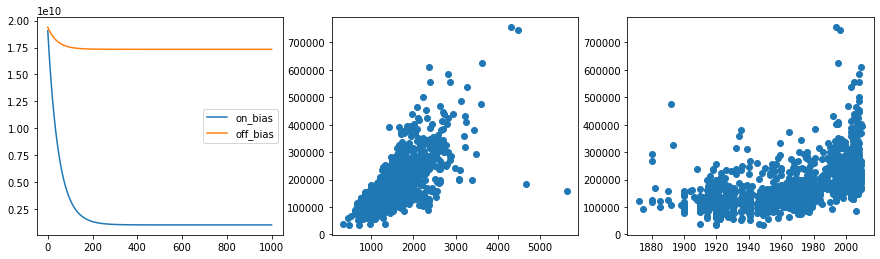

In [12]:
plt.figure(figsize=(15, 4))
plt.subplot(131)
plt.plot(slr.loss, label='on_bias')
plt.plot(slr_nobias.loss, label='off_bias')
plt.legend()
plt.subplot(132)
plt.scatter(X[:, 0], y)
plt.subplot(133)
plt.scatter(X[:, 1], y);

>バイアス項がないとすぐに目的関数が収束し、学習が進まなかった。理由は、バイアス項がない一次関数は原点(0, 0)を通る直線となるが、今回のサンプルプロット図からわかるように誤差が最小となる直線を原点を通る直線で表現することは難しい。そのため学習が不十分なまま収束したものと考えられる。

# 【問題9】（アドバンス課題）特徴量の多次元化
特徴量の二乗や三乗を入力に利用すると学習結果がどう変化するか検証してください。

### ・特徴量を二乗

In [13]:
# データの読み込み
train = pd.read_csv('../kaggledata/train.csv')
X = train[['GrLivArea', 'YearBuilt']].values
y = train[['SalePrice']].values

X[:, 0] = X[:, 0]**2
X[:, 1] = X[:, 1]**2

# 分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 標準化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# 学習
slr_squared = ScratchLinearRegression(1000, 0.01, no_bias=False, verbose=False)
slr_squared.fit(X_train_std, y_train, X_test_std, y_test)

# 推定
slr_squared_pred = slr_squared.predict(X_test_std)

In [14]:
MSE(slr_pred, y_test) - MSE(slr_squared_pred, y_test)

-1223542175.8210907

>二乗することによって、精度が悪化した。逆に平方根を取るとどうなるのか..

### ・特徴量の平方根

In [15]:
# データの読み込み
train = pd.read_csv('../kaggledata/train.csv')
X = train[['GrLivArea', 'YearBuilt']].values
y = train[['SalePrice']].values

X[:, 0] = X[:, 0]**.5
X[:, 1] = X[:, 1]**.5

# 分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 標準化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# 学習
slr_sqrt = ScratchLinearRegression(1000, 0.01, no_bias=False, verbose=False)
slr_sqrt.fit(X_train_std, y_train, X_test_std, y_test)

# 推定
slr_sqrt_pred = slr_sqrt.predict(X_test_std)

In [16]:
MSE(slr_pred, y_test) - MSE(slr_sqrt_pred, y_test)

972765372.4986076

>累乗で悪化し、平方根で好転した理由。  
多くのモデルは、正規分布を仮定していることが多いので、対数変換により正規分布に近似させる。データを正規分布に従わせる以外にも、外れ値が含まれるデータの分散を小さくするためにも使われる。すなわち、対数変換により極端に大きすぎる外れ値を平均値に近づける。これに伴い、ゼロに近い値をもう少し区別しやすくなる。特徴量の平方根を取る方法も同様の効果が見込める可能性がある。

# 【問題10】（アドバンス課題）更新式の導出
最急降下法の更新式は以下でした。この式が導出される過程を説明してください。

$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]
$$

以下の式から説明をはじめることができます。

$$
\theta_j := \theta_j - \frac{\partial}{\partial \theta_j}J(\theta)
$$

目的関数（損失関数）$J(\theta)$ は次の式です。

$$
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$

## 解答

目的関数を最小化することが最急降下法の目的であり、問題11のグラフからわかるように目的関数が最小というのは接線の勾配が限りなく0に近い時の$\theta$の値を意味する。このことを前提に解説を行う。

1. 目的関数を$\theta$で微分する。それによってある$\theta$に対する目的関数との接線が求まる。それが正であった場合、  
$\theta_j := \theta_j -$ 正の勾配  
となり、初めの$\theta$が負の方向へ更新される。勾配が負であれば正の方向へ更新される。これを延々繰り返すことで勾配が最小値へ収束していく。式で表すと下記のようになる。
$$
\frac{\partial}{\partial \theta_j}J(\theta) = \frac{1}{m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})x_{j}^{(i)}
$$
2. これに学習率$\alpha$を乗算することによって学習を効率化する。

# 【問題11】（アドバンス課題）局所最適解の問題
最急降下法には一般的に局所最適解の問題があります。しかし、線形回帰では学習を続ければ必ず最適解を求めることができます。それはなぜか数式やグラフを用いて説明してください。

## 解答
$h_\theta(x) =  \theta x$ を例に考える。

x = [1 2 3]
y = [1 2 3]
theta = [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
loss = [282.3, 233.3, 189.0, 149.3, 114.3, 84.0, 58.3, 37.3, 21.0, 9.3, 2.3, 0.0, 2.3, 9.3, 21.0, 37.3, 58.3, 84.0, 114.3, 149.3, 189.0, 233.3, 282.3]


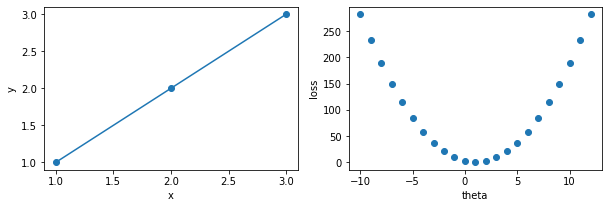

In [17]:
x = np.arange(1, 4, 1)
y = np.arange(1, 4, 1)
m = len(x)

J_list = []
theta_list = []
for i in range(-10, 13):
    theta = np.full(m, i)
    theta_x = theta * x
    J_theta = np.mean((theta_x - y)**2) / 2
    J_list.append(J_theta)
    theta_list.append(i)
    
print(f'x = {x}')
print(f'y = {y}')
print(f'theta = {theta_list}')
print(f'loss = {list(map(round, J_list, [1]*len(J_list)))}')
plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, marker='o')
plt.subplot(122)
plt.xlabel('theta')
plt.ylabel('loss')
plt.scatter(theta_list, J_list);

>$$
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$
今回用いた目的関数は二次関数であり、グラフ化すると上図のように下に凸の放物線状になる。よって局所最適解が存在せず学習を続ければ必ず最適解を求めることができる。